In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation
from IPython.display import HTML
import matplotlib.image as mpimg


plt.style.use('seaborn')
#rc('animation', html='html5')


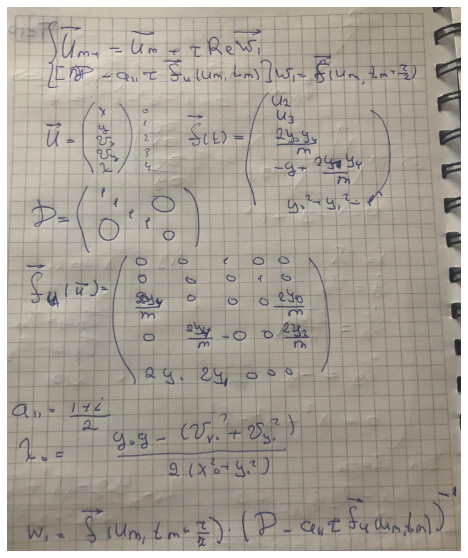

In [2]:
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
fig.patch.set_visible(False)
plt.grid(0)
plt.imshow(mpimg.imread('photo/math_oscillitar.JPG'))
plt.show()

In [3]:
def cros1(u, tau, M, g, l, mass, F, Fu):
    a11 = (1 +1.j)/2
    for m in range(M):
        D = np.eye(5, dtype=complex)
        D[-1, -1] = 0
        
        A = D - a11*tau*Fu(u[m], mass)
        w11 = np.linalg.solve(A, F(u[m], mass, g, l))
        w1 = np.dot(F(u[m], mass, g, l), np.linalg.inv(A))
        u[m + 1] = u[m] + tau*w11.real
        
    return u

In [4]:
def get_f(u, mass, g, l):
    f = np.zeros((5,), dtype=complex)
    f[0] = u[2]
    f[1] = u[3] 
    f[2] = 2*u[0]*u[4] / mass
    f[3] = 2*u[1]*u[4] / mass - g
    f[4] = (u[0]**2 + u[1]**2 - l**2)

    return f

def get_fu(u, mass):
    fu = np.array([
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 2*u[0]/mass],
        [0, 0, 0, 0, 2*u[1]/mass],
        [2*u[0], 2*u[1], 0, 0, 0],
    ], dtype=complex)
    return fu

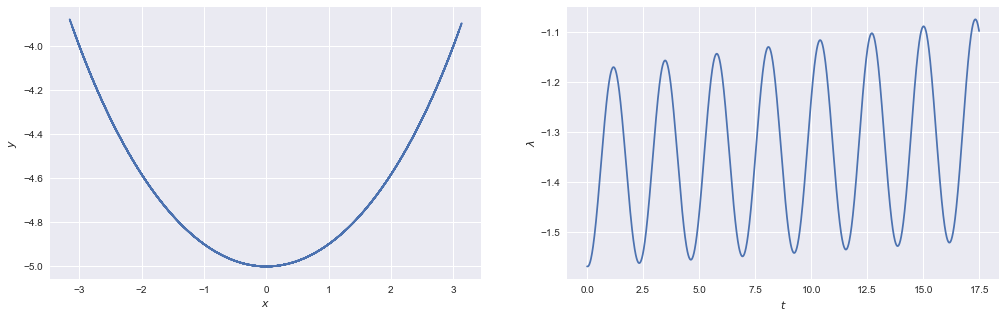

In [5]:
t_0 = 0.; T = 17.5
M = 1500
tau =  (T - t_0) / M

x_0 = 3; y_0 = -4
vx_0 = 0.; vy_0 = 0.

g = 9.801
l = (x_0**2 + y_0**2)**(1/2)
mass = 2

lambda_0 = (y_0*g - vx_0**2 - vy_0**2) / (x_0**2 + y_0**2) * mass / 2

u = np.zeros((M + 1, 5))
u[0,0] = x_0
u[0,1] = y_0 
u[0,2] = vx_0
u[0,3] = vy_0
u[0,4] = lambda_0 
u = cros1(u, tau, M, g, l, mass, F=get_f, Fu=get_fu)

x = u[:, 0]
y = u[:, 1]
t = np.linspace(t_0, T, M+1)
fig, ax = plt.subplots(1, 2, figsize=(17,5))
ax[0].plot(x, y)
ax[1].plot(t, u[:, 4])
ax[1].set_xlabel('$t$'); ax[1].set_ylabel('$\lambda$')
ax[0].set_xlabel('$x$'); ax[0].set_ylabel('$y$')
plt.show()

In [6]:
fig = plt.figure(figsize=(8,6))
plt.style.use('default')

plt.title('Малые колебания математического маятника.', fontsize=15)
plt.xlabel('X, м'); plt.ylabel('Y, м')
plt.xlim([-4, 4])
plt.ylim([-5.5, 0])
plt.grid(1)
plt.plot([0], [0], 'o', color='black', markersize=10)
point, = plt.plot([x_0], [y_0], 'o', color='b', markersize=15, label='Тело')
plt.plot(x, y, '--b', alpha=0.3, label='Траектория движения')
line, = plt.plot([0, x_0], [0, y_0], '-b', lw=1)
title = f'Начальные условия:\n$x_0=$ {x_0}, $y_0 =$ {y_0}\n$V^0_x=${vx_0}, $V^0_y=${vy_0}'
plt.legend(title=title, loc='upper left')


def drawframe(n):
    x = u[n, 0]
    y = u[n, 1]
    point.set_data(x, y)
    line.set_data([0, x], [0, y])
    return (point, line)

anim = animation.FuncAnimation(fig, drawframe, frames=M, interval=10, blit=True)
plt.close()
HTML(anim.to_html5_video())

In [7]:
#anim.save(filename='photo/math_oscillator_modeling.gif',  writer='imagemagick', fps=60)